In [14]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

project_root = Path.cwd().parent
sys.path.append(str(project_root))

from src.constants import STYLE_PATH
from src.data_sampler import (
    f_cosine_hc2_1_feat,
    sigma_cubic_hc2_1_feat,
)
from src.utils.utils_results import load_meta_model_benchmarking_results
from src.visualizations.figure_saver import NotebookFigureSaver
from src.visualizations.plot_dgp import sample_and_plot_true
from src.visualizations.plot_model_comparison import plot_model_comparison
from src.visualizations.plot_uq_multi import plot_uq_multi

plt.style.use(STYLE_PATH)

In [15]:
FigureSaver = NotebookFigureSaver(chapter_id="03_exp3_inbetween_ood")

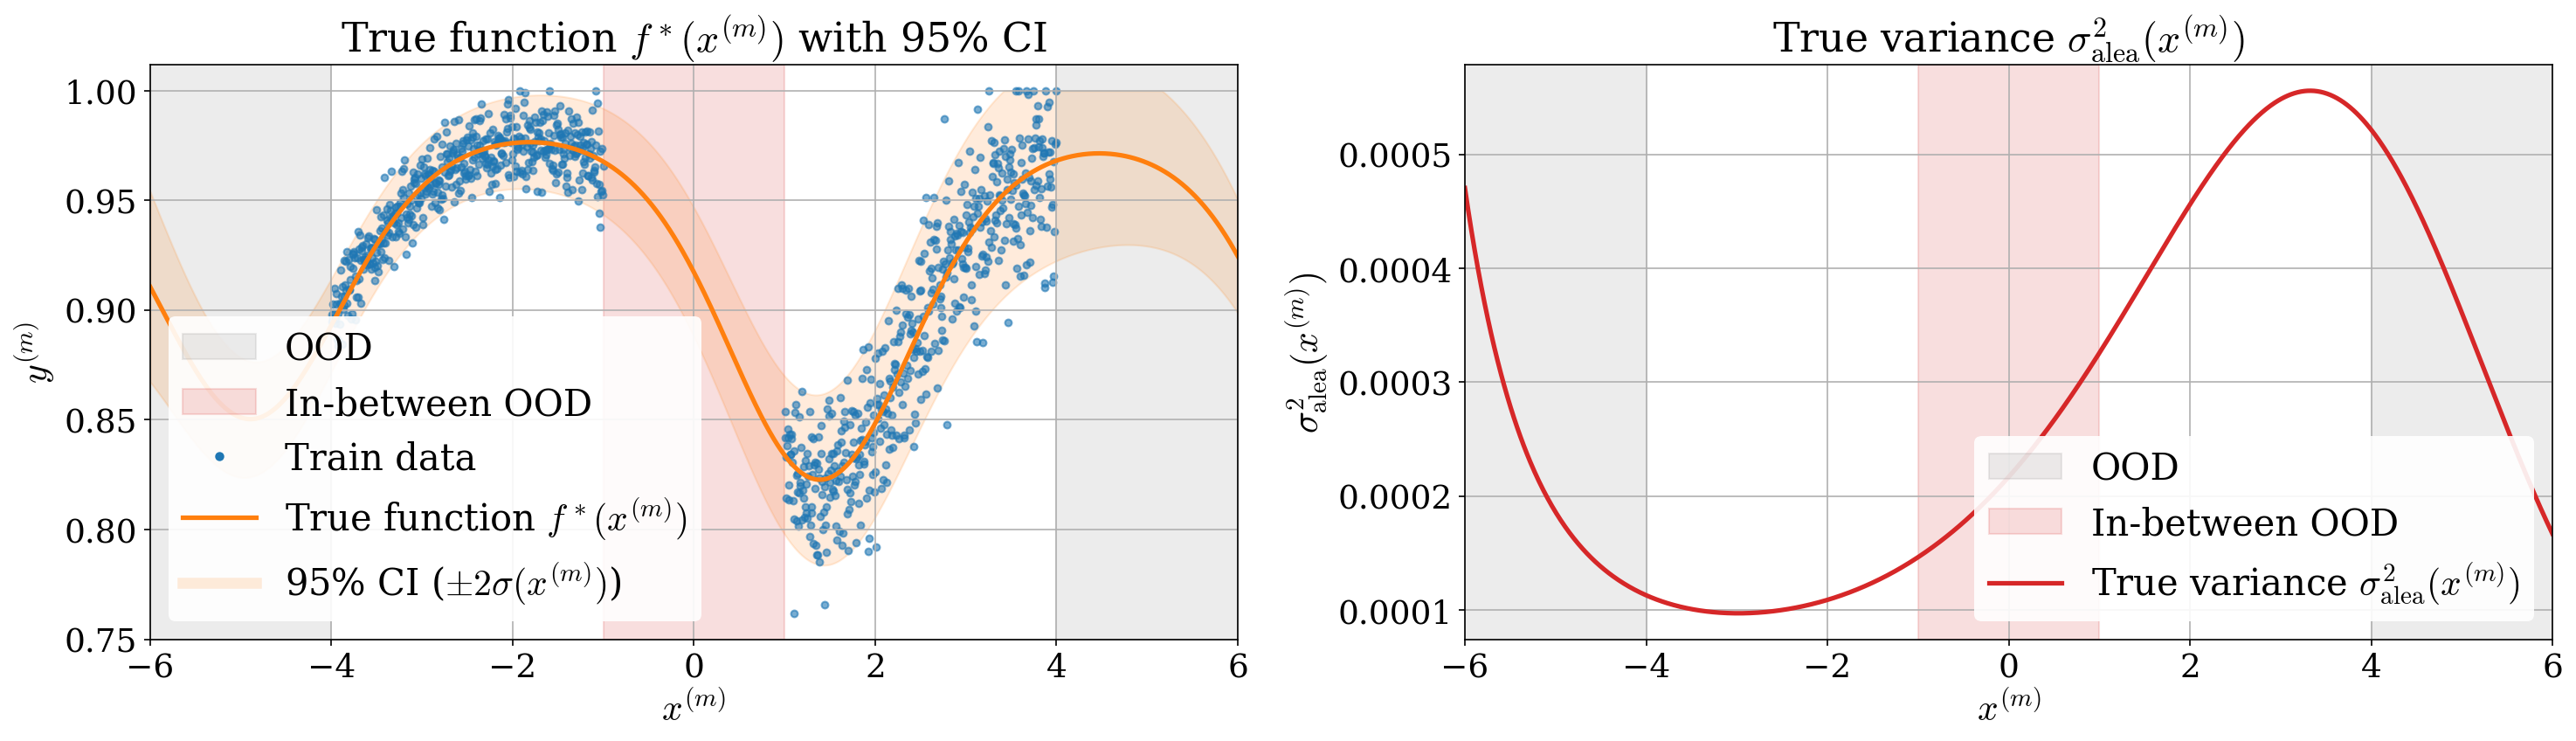

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/03_exp3_inbetween_ood/exp3_dgp.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/03_exp3_inbetween_ood/exp3_dgp.pdf


In [16]:
fig, ax = sample_and_plot_true(
    n_points=1000,
    train_repeats=0,
    seed=42,
    f_true=f_cosine_hc2_1_feat,
    sigma_true=sigma_cubic_hc2_1_feat,
    ood_bounds=[[-4.0, -1.0], [1.0, 4.0]],
    figsize=(20, 6),
)
FigureSaver.save_fig(fig, "exp3_dgp")

In [17]:
bbb_baseline = load_meta_model_benchmarking_results("exp1_n_unique/bbb/seed-42_fn-1_nz-1_tri-[-4.0, 4.0]_tei-[-6.0, 6.0]_trn-1000x0_grid-1000_model-bbb/251031_1826")
bbb_in_between_ood = load_meta_model_benchmarking_results("exp3_inbetween_ood/bbb/seed-42_fn-1_nz-1_tri-[[-4.0, -1.0], [1.0, 4.0]]_tei-[-6.0, 6.0]_trn-1000x0_grid-1000_model-bbb/251031_2327")

mcdropout_baseline = load_meta_model_benchmarking_results("exp1_n_unique/mcdropout/seed-42_fn-1_nz-1_tri-[-4.0, 4.0]_tei-[-6.0, 6.0]_trn-1000x0_grid-1000_model-mcdropout/251031_1826")
mcdropout_in_between_ood = load_meta_model_benchmarking_results("exp3_inbetween_ood/mcdropout/seed-42_fn-1_nz-1_tri-[[-4.0, -1.0], [1.0, 4.0]]_tei-[-6.0, 6.0]_trn-1000x0_grid-1000_model-mcdropout/251031_2327")

ensemble_baseline = load_meta_model_benchmarking_results("exp1_n_unique/ensemble/seed-42_fn-1_nz-1_tri-[-4.0, 4.0]_tei-[-6.0, 6.0]_trn-1000x0_grid-1000_model-ensemble/251031_1827")
ensemble_in_between_ood = load_meta_model_benchmarking_results("exp3_inbetween_ood/ensemble/seed-42_fn-1_nz-1_tri-[[-4.0, -1.0], [1.0, 4.0]]_tei-[-6.0, 6.0]_trn-1000x0_grid-1000_model-ensemble/251031_2328")

evidential_baseline = load_meta_model_benchmarking_results("exp1_n_unique/evidential/seed-42_fn-1_nz-1_tri-[-4.0, 4.0]_tei-[-6.0, 6.0]_trn-1000x0_grid-1000_model-evidential/251031_1826")
evidential_in_between_ood = load_meta_model_benchmarking_results("exp3_inbetween_ood/evidential/seed-42_fn-1_nz-1_tri-[[-4.0, -1.0], [1.0, 4.0]]_tei-[-6.0, 6.0]_trn-1000x0_grid-1000_model-evidential/251031_2327")

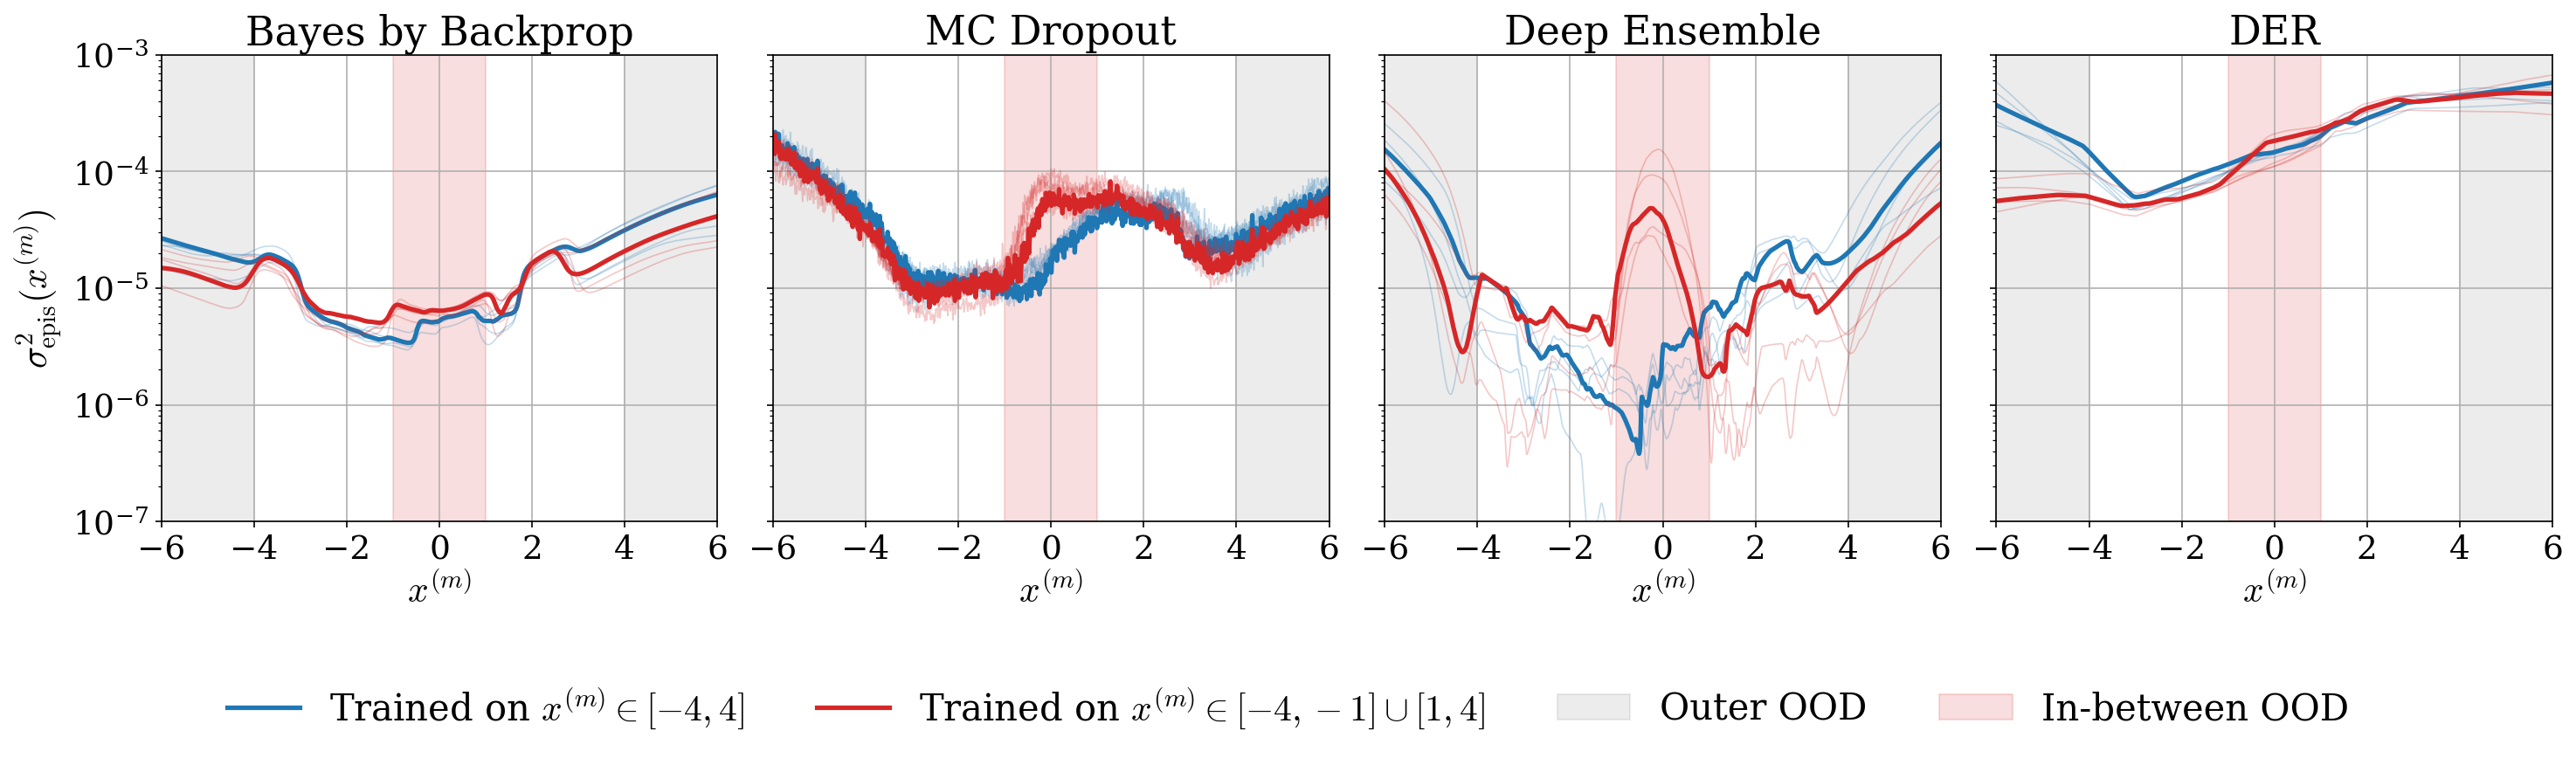

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/03_exp3_inbetween_ood/exp3_epistemic_model_comparison.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/03_exp3_inbetween_ood/exp3_epistemic_model_comparison.pdf


In [18]:
fig, leg = plot_model_comparison(
    groups=[
        [bbb_baseline, bbb_in_between_ood],
        [mcdropout_baseline, mcdropout_in_between_ood],
        [ensemble_baseline, ensemble_in_between_ood],
        [evidential_baseline, evidential_in_between_ood]
    ],
    labels = [
        [r"Trained on $x^{(m)} \in [-4, 4]$", r"Trained on $x^{(m)} \in [-4, -1] \cup [1, 4]$"],
        [r"Trained on $x^{(m)} \in [-4, 4]$", r"Trained on $x^{(m)} \in [-4, -1] \cup [1, 4]$"],
        [r"Trained on $x^{(m)} \in [-4, 4]$", r"Trained on $x^{(m)} \in [-4, -1] \cup [1, 4]$"],
        [r"Trained on $x^{(m)} \in [-4, 4]$", r"Trained on $x^{(m)} \in [-4, -1] \cup [1, 4]$"],
    ],
    metric="epistemic",
    column_titles=["Bayes by Backprop", "MC Dropout", "Deep Ensemble", "DER"],
    ood_bounds=[
        [(-np.inf, -4), (-1, 1), (4, np.inf)],
        [(-np.inf, -4), (-1, 1), (4, np.inf)],
        [(-np.inf, -4), (-1, 1), (4, np.inf)],
        [(-np.inf, -4), (-1, 1), (4, np.inf)],
    ],
    x_min=[-6, -6, -6, -6],
    x_max=[ 6,  6,  6,  6],
    y_limits=[(10e-8, 10e-4), (10e-8, 10e-4), (10e-8, 10e-4), (10e-8, 10e-4)],
    y_logscale=[True, True, False, True],
    show_runs=True,
    figsize=(20, 6),
    model_colors=[
        ["tab:blue", "tab:red"],
        ["tab:blue", "tab:red"],
        ["tab:blue", "tab:red"],
        ["tab:blue", "tab:red"],
    ],
    share_yaxis=True,
)
FigureSaver.save_fig(fig, "exp3_epistemic_model_comparison")


Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/03_exp3_inbetween_ood/exp3_bbb.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/03_exp3_inbetween_ood/exp3_bbb.pdf


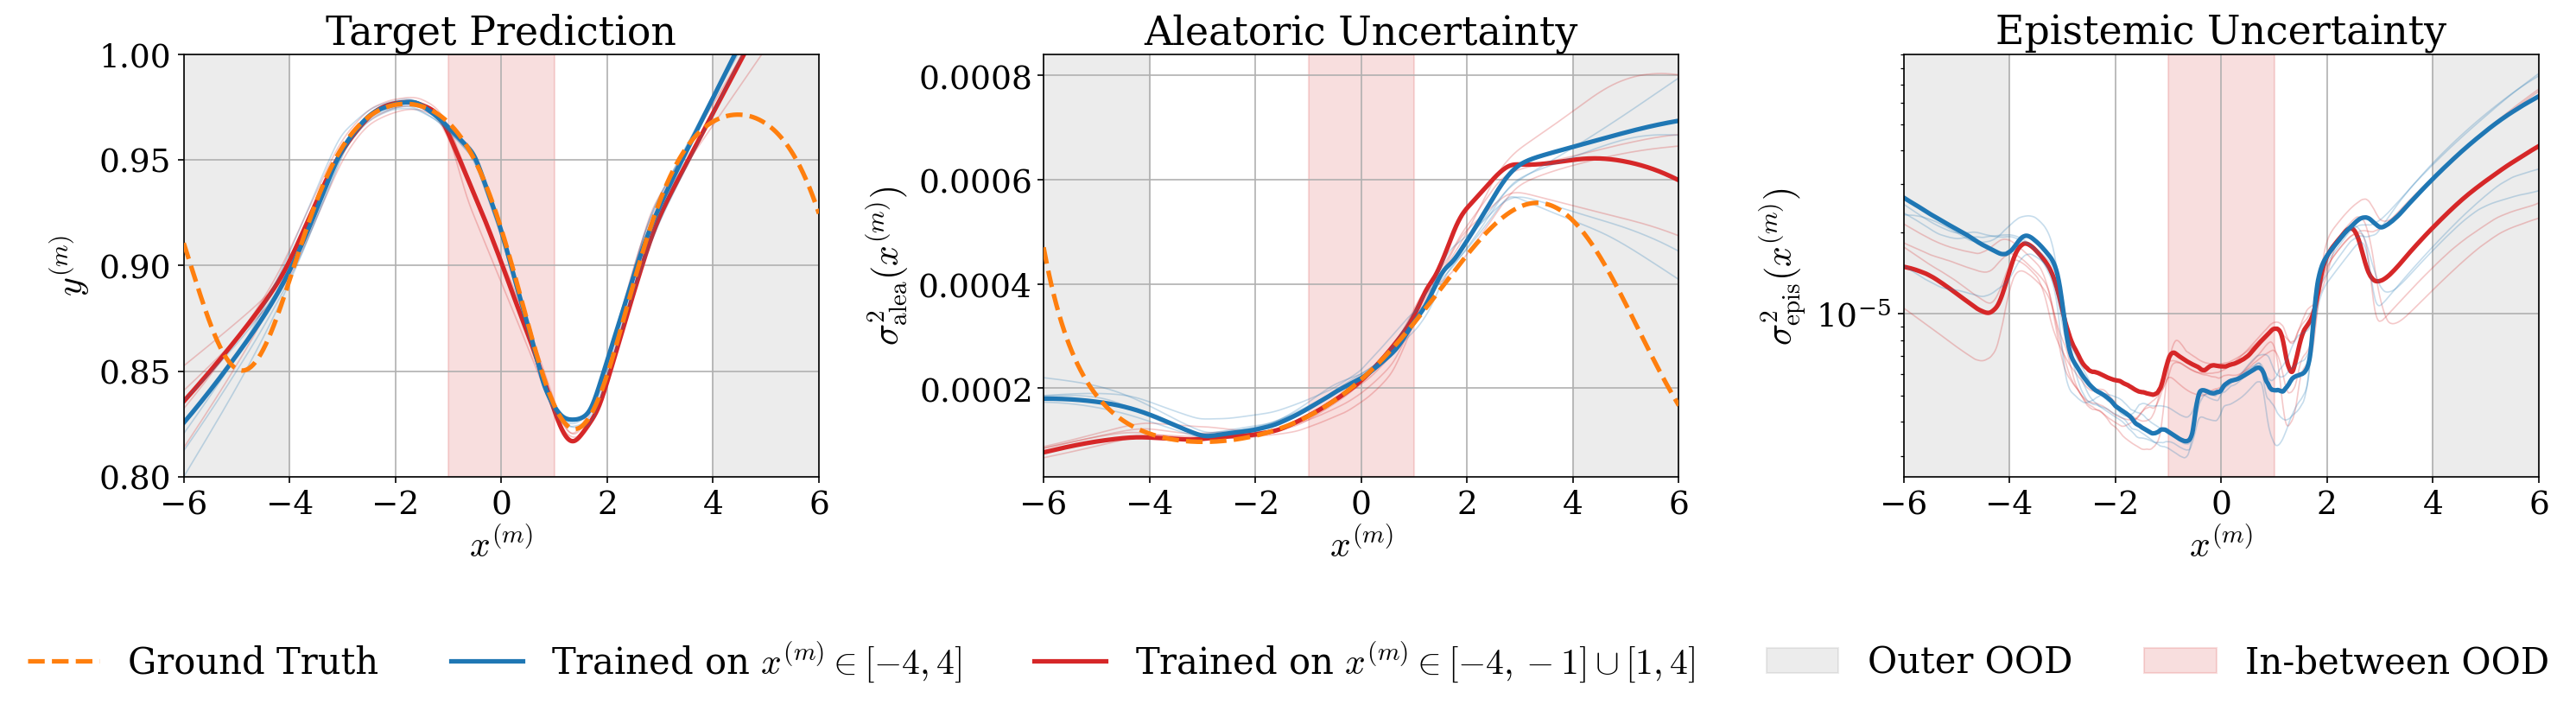

In [19]:
fig, ax = plot_uq_multi( 
    bbb_baseline,
    bbb_in_between_ood,
    labels=[r"Trained on $x^{(m)} \in [-4, 4]$", r"Trained on $x^{(m)} \in [-4, -1] \cup [1, 4]$"],
    ood_bounds=[(-np.inf, -4), (-1, 1), (4, np.inf)],
    x_min=-6, x_max=6,
    y_limits={
    "prediction": (0.8, 1.0),
    },
    y_logscale={
        "aleatoric": False, 
        "epistemic": True,
        "prediction": False,
    },
    show_runs=True,
    figsize=(20, 6),
    model_colors=["tab:blue", "tab:red", "tab:green"],
)
FigureSaver.save_fig(fig, "exp3_bbb")

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/03_exp3_inbetween_ood/exp3_mcdropout.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/03_exp3_inbetween_ood/exp3_mcdropout.pdf


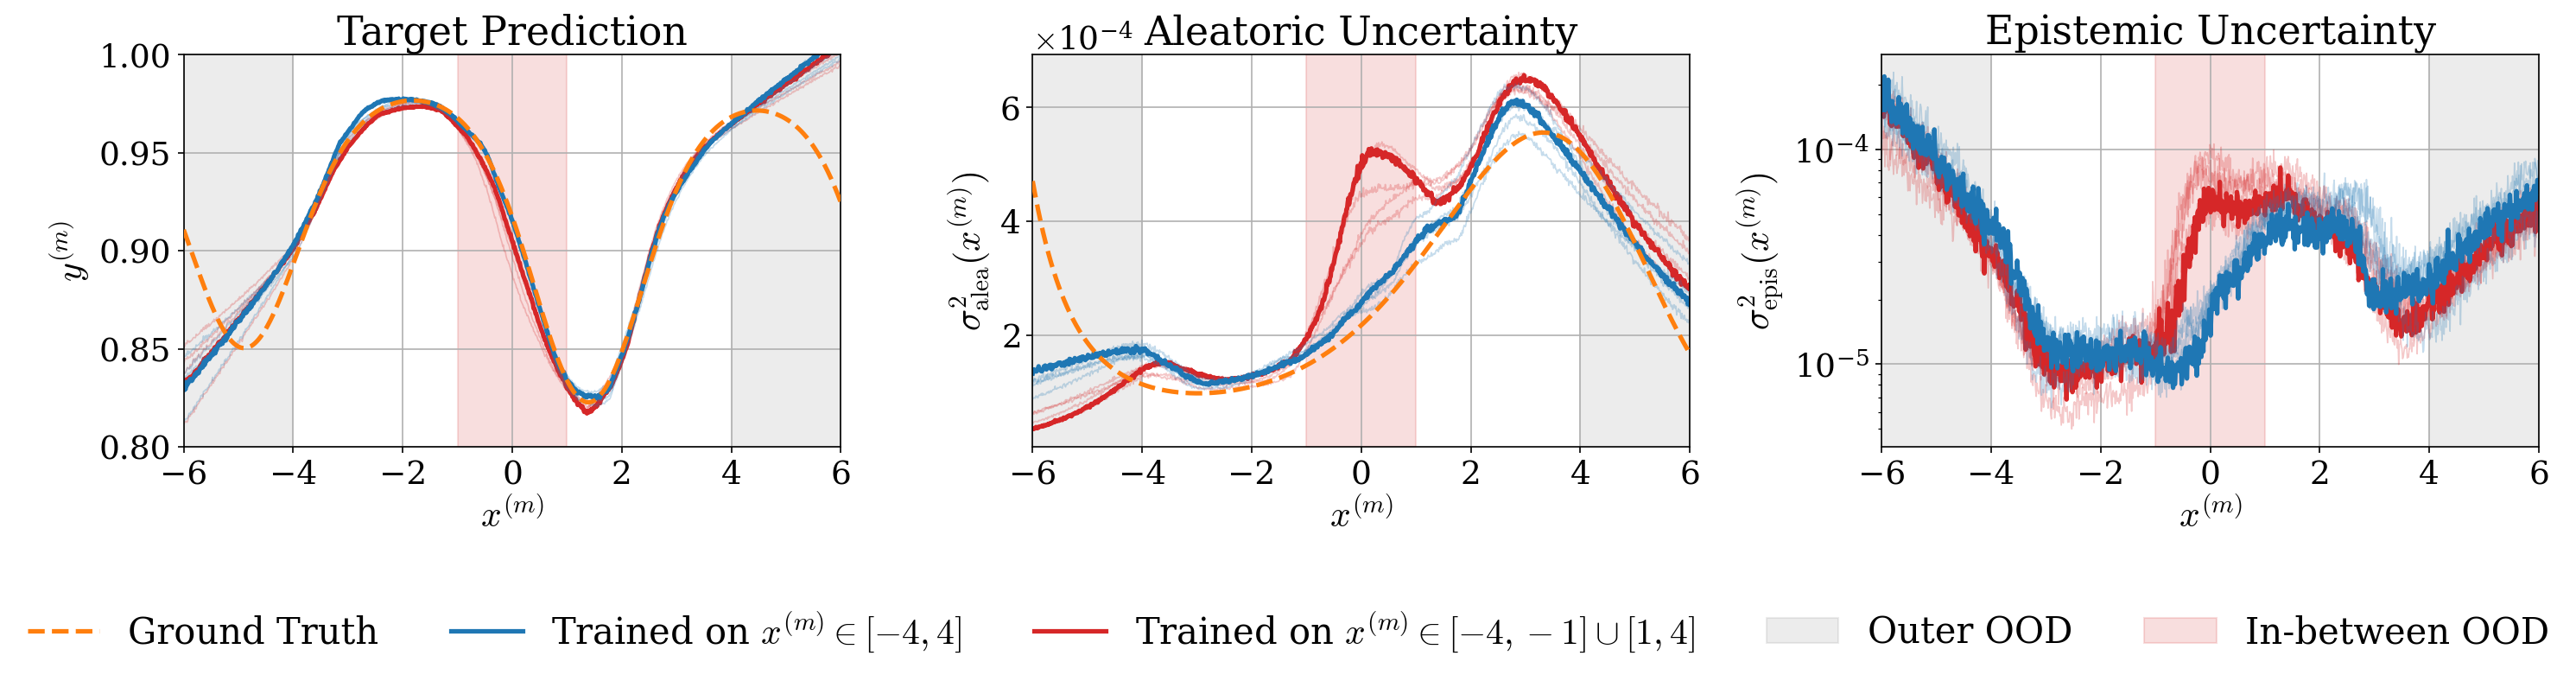

In [20]:
fig, ax = plot_uq_multi( 
    mcdropout_baseline,
    mcdropout_in_between_ood,
    labels=[r"Trained on $x^{(m)} \in [-4, 4]$", r"Trained on $x^{(m)} \in [-4, -1] \cup [1, 4]$"],
    ood_bounds=[(-np.inf, -4), (-1, 1), (4, np.inf)],
    x_min=-6, x_max=6,
    y_limits={
    "prediction": (0.8, 1.0),
    },
    y_logscale={
        "aleatoric": False, 
        "epistemic": True,
        "prediction": False,
    },
    show_runs=True,
    figsize=(20, 6),
    model_colors=["tab:blue", "tab:red", "tab:green"],
)
FigureSaver.save_fig(fig, "exp3_mcdropout")

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/03_exp3_inbetween_ood/exp3_ensemble.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/03_exp3_inbetween_ood/exp3_ensemble.pdf


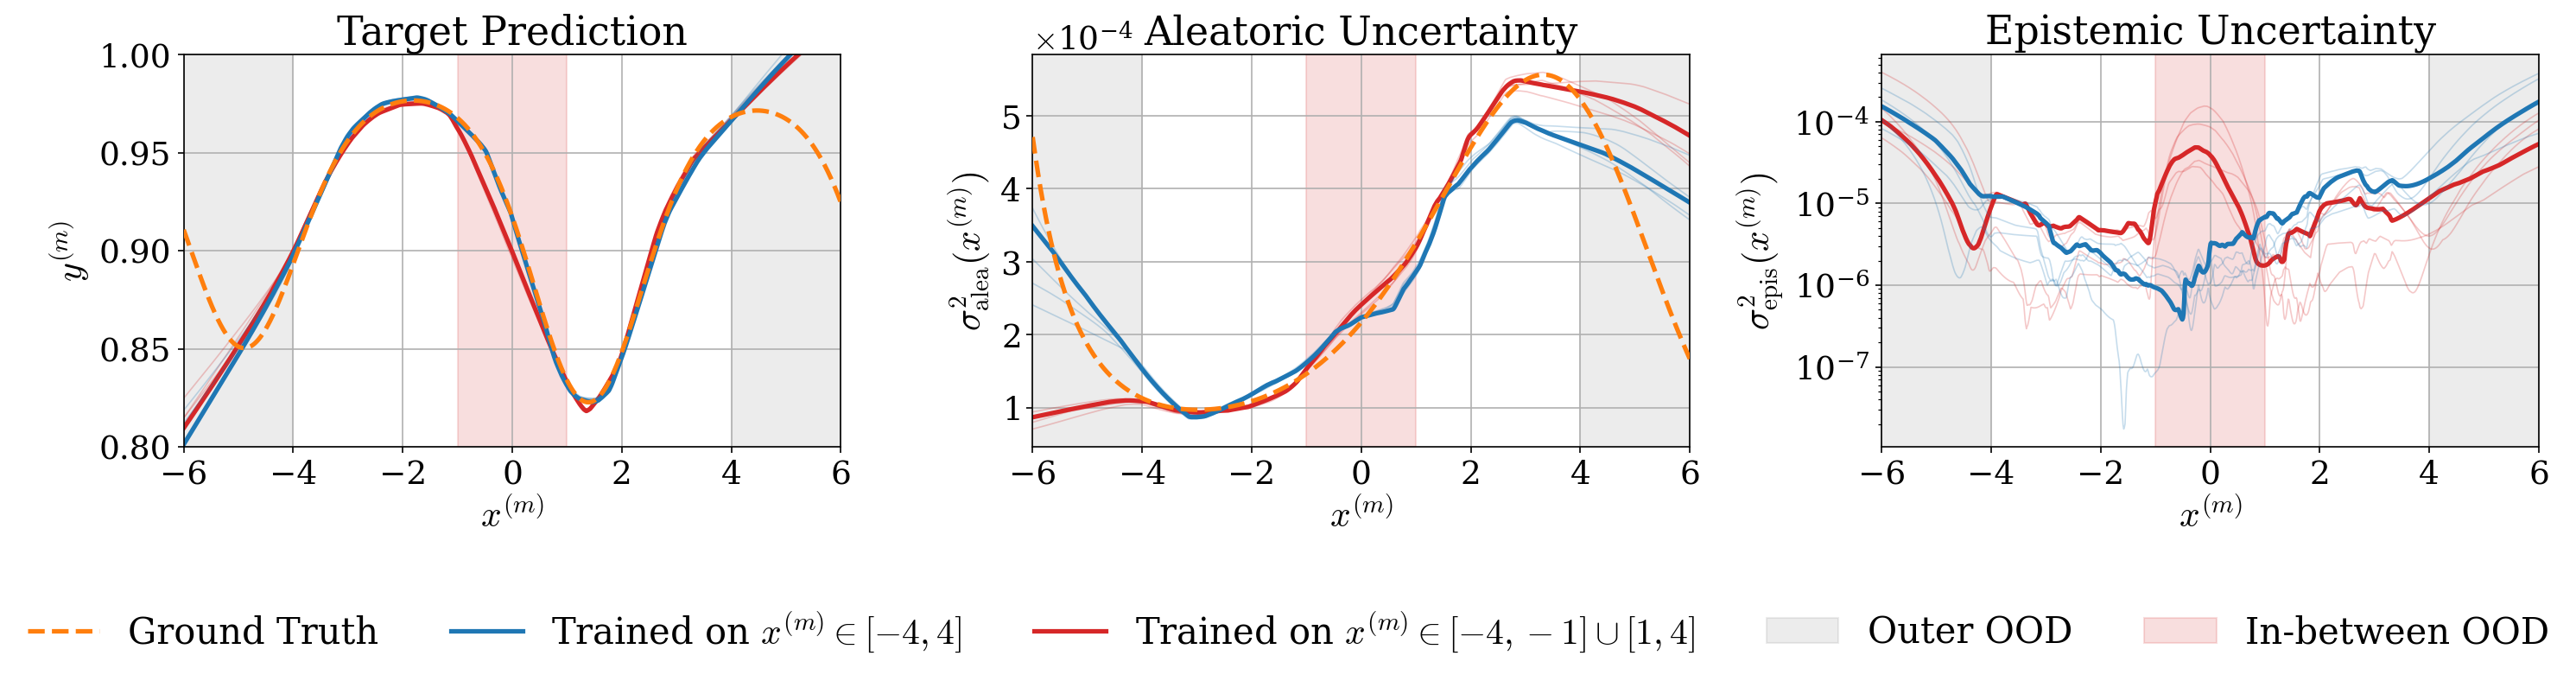

In [21]:
fig, ax = plot_uq_multi( 
    ensemble_baseline,
    ensemble_in_between_ood,
    labels=[r"Trained on $x^{(m)} \in [-4, 4]$", r"Trained on $x^{(m)} \in [-4, -1] \cup [1, 4]$"],
    ood_bounds=[(-np.inf, -4), (-1, 1), (4, np.inf)],
    x_min=-6, x_max=6,
    y_limits={
    "prediction": (0.8, 1.0),
    },
    y_logscale={
        "aleatoric": False, 
        "epistemic": True,
        "prediction": False,
    },
    show_runs=True,
    figsize=(20, 6),
    model_colors=["tab:blue", "tab:red", "tab:green"],
)
FigureSaver.save_fig(fig, "exp3_ensemble")

Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/03_exp3_inbetween_ood/exp3_evidential.png
Saved: /Users/scheuringp/Coding/uq-algorithm-selection/images/03_exp3_inbetween_ood/exp3_evidential.pdf


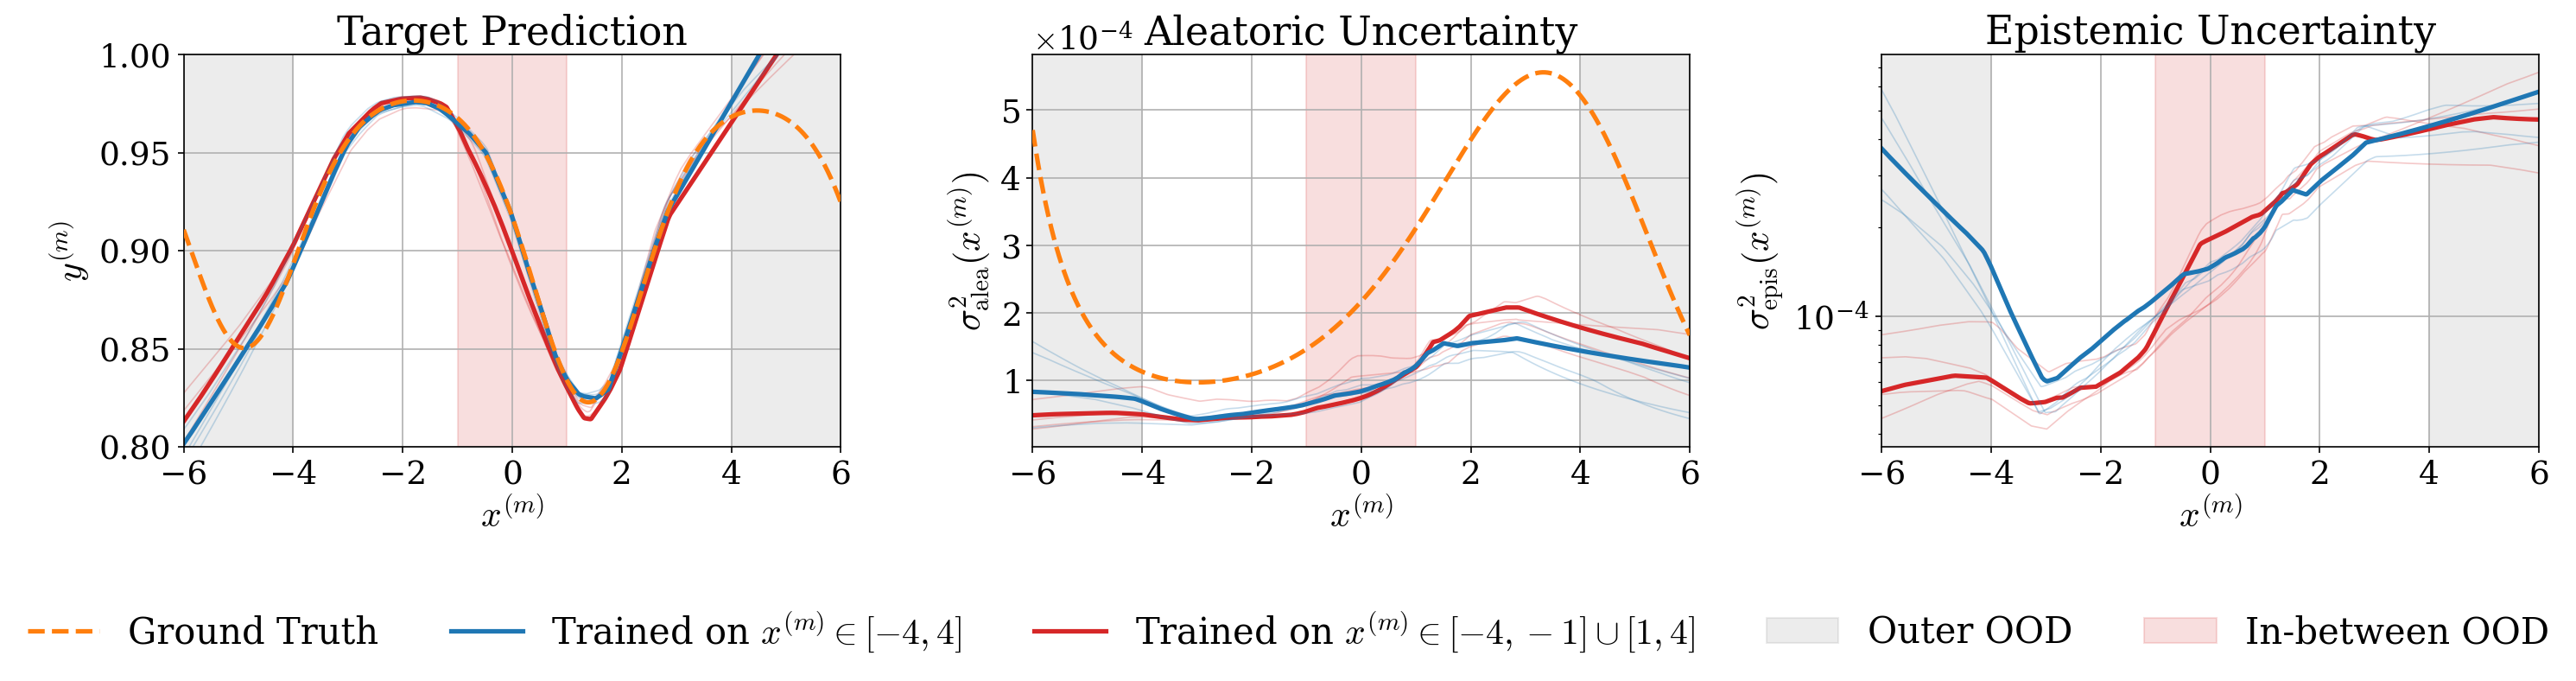

In [22]:
fig, ax = plot_uq_multi( 
    evidential_baseline,
    evidential_in_between_ood,
    labels=[r"Trained on $x^{(m)} \in [-4, 4]$", r"Trained on $x^{(m)} \in [-4, -1] \cup [1, 4]$"],
    ood_bounds=[(-np.inf, -4), (-1, 1), (4, np.inf)],
    x_min=-6, x_max=6,
    y_limits={
    "prediction": (0.8, 1.0),
    },
    y_logscale={
        "aleatoric": False, 
        "epistemic": True,
        "prediction": False,
    },
    show_runs=True,
    figsize=(20, 6),
    model_colors=["tab:blue", "tab:red", "tab:green"],
)
FigureSaver.save_fig(fig, "exp3_evidential")